In [1]:
import pandas as pd
import boto3
import io

# Read data from S3
s3_client = boto3.client('s3')
obj = s3_client.get_object(Bucket='campaignai-rg', Key='synthetic_campaign_data_train.csv')
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

print("Shape:", df.shape)
df.head()

Shape: (200000, 27)


,Campaign_ID,Year,Quarter,Start_Date,End_Date,Product_Type,Campaign_Type,Campaign_Name,Objective,Target_Audience,...,Clicks,Conversion_Rate,Leads,Revenue,Actual_Spend,ROI,Engagement_Rate,Strategy_Overview,Key_Lessons_Learned,Notes
0,CAMP000001,2022,Q4,2022-11-06,2022-12-18,Smartphones,Social Media,Winter 2022 - Smartphones Social Media,Launch product,Tech Enthusiasts,...,4533,0.016655,422,80166.396881,87031.158778,-7.887706,0.069099,Targeted Tech Enthusiasts through Social Media...,"Campaign underperformed on ROI, requires strat...",Floor white again build involve. Old give mout...
1,CAMP000002,2020,Q4,2020-10-26,2020-12-03,Smart Watches,Email Marketing,Spring 2020 - Smart Watches Email Marketing,Increase brand awareness,Seniors,...,36623,0.036496,3609,638782.159412,77407.102799,725.224219,0.074850,Targeted Seniors through Email Marketing with ...,Strong ROI performance suggests effective targ...,NaN
2,CAMP000003,2021,Q4,2021-12-11,2022-01-19,Smartphones,Content Marketing,Spring 2021 - Smartphones Content Marketing,Launch product,Seniors,...,29061,0.014340,2231,414017.592257,77691.384336,432.900264,0.057030,Targeted Seniors through Content Marketing wit...,Strong ROI performance suggests effective targ...,NaN
3,CAMP000004,2021,Q1,2021-02-11,2021-04-25,Smart Home Security,Content Marketing,Winter 2021 - Smart Home Security Content Mark...,Increase brand awareness,Seniors,...,21373,0.030926,1228,435456.056378,36925.631960,1079.278548,0.043847,Targeted Seniors through Content Marketing wit...,Strong ROI performance suggests effective targ...,NaN
4,CAMP000005,2022,Q2,2022-06-08,2022-08-08,Laptop Computers,Direct Mail,Summer 2022 - Laptop Computers Direct Mail,Generate leads,Seniors,...,12509,0.014079,403,248640.337150,72817.742569,241.455706,0.058437,Targeted Seniors through Direct Mail with focu...,Strong ROI performance suggests effective targ...,NaN


In [5]:
# Check data info and missing values
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Campaign_ID          200000 non-null  object 
 1   Year                 200000 non-null  int64  
 2   Quarter              200000 non-null  object 
 3   Start_Date           200000 non-null  object 
 4   End_Date             200000 non-null  object 
 5   Product_Type         200000 non-null  object 
 6   Campaign_Type        200000 non-null  object 
 7   Campaign_Name        200000 non-null  object 
 8   Objective            200000 non-null  object 
 9   Target_Audience      200000 non-null  object 
 10  Geographic_Region    200000 non-null  object 
 11  Budget               200000 non-null  float64
 12  Channels             200000 non-null  object 
 13  Creative_Type        200000 non-null  object 
 14  Duration_Days        200000 non-null  int64  
 15  Opt

In [2]:
# Get summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,Year,Budget,Duration_Days,Impressions,Clicks,Conversion_Rate,Leads,Revenue,Actual_Spend,ROI,Engagement_Rate
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000
mean,2021.995615,86301.332388,48.446695,550452.332480,16495.297955,0.027984,989.494740,2.544687e+05,86304.116667,232.407803,0.050000
std,1.414505,35134.313141,24.236668,259752.755266,10468.140745,0.010898,773.974461,2.275028e+05,35536.216922,329.618100,0.017317
min,2020.000000,40000.028614,7.000000,100000.000000,1016.000000,0.010000,22.000000,4.913111e+03,36062.838593,-96.529238,0.020000
25%,2021.000000,63064.816688,28.000000,326372.250000,8097.000000,0.020326,409.000000,9.947903e+04,62773.938651,18.830676,0.035009
50%,2022.000000,77399.894749,48.000000,550336.000000,14186.000000,0.026337,767.500000,1.876152e+05,77408.687964,131.856626,0.050014
75%,2023.000000,99597.373828,69.000000,775408.750000,23112.000000,0.034161,1356.000000,3.340489e+05,99154.849873,329.920752,0.064964
max,2024.000000,239996.040431,90.000000,999996.000000,49864.000000,0.059999,4854.000000,2.752156e+06,262883.431084,4955.506740,0.079999


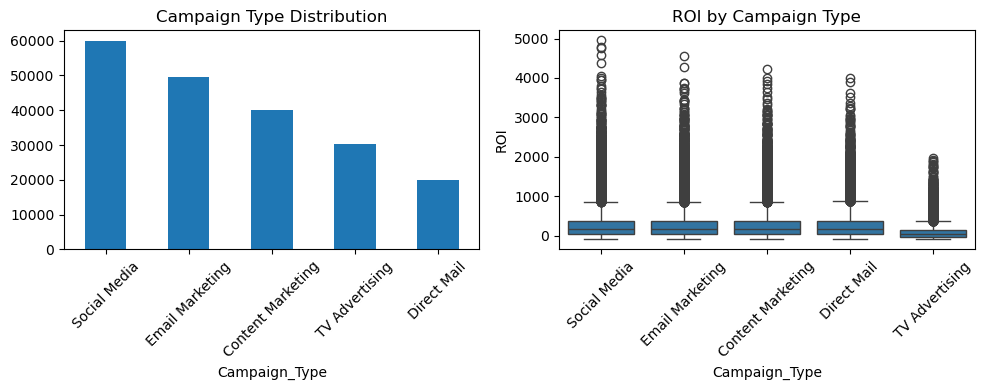

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.figure(figsize=(10, 4))

# Plot campaign type distribution
plt.subplot(1, 2, 1)
df['Campaign_Type'].value_counts().plot(kind='bar')
plt.title('Campaign Type Distribution')
plt.xticks(rotation=45)

# Plot ROI boxplot by campaign type
plt.subplot(1, 2, 2)
sns.boxplot(x='Campaign_Type', y='ROI', data=df)
plt.title('ROI by Campaign Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

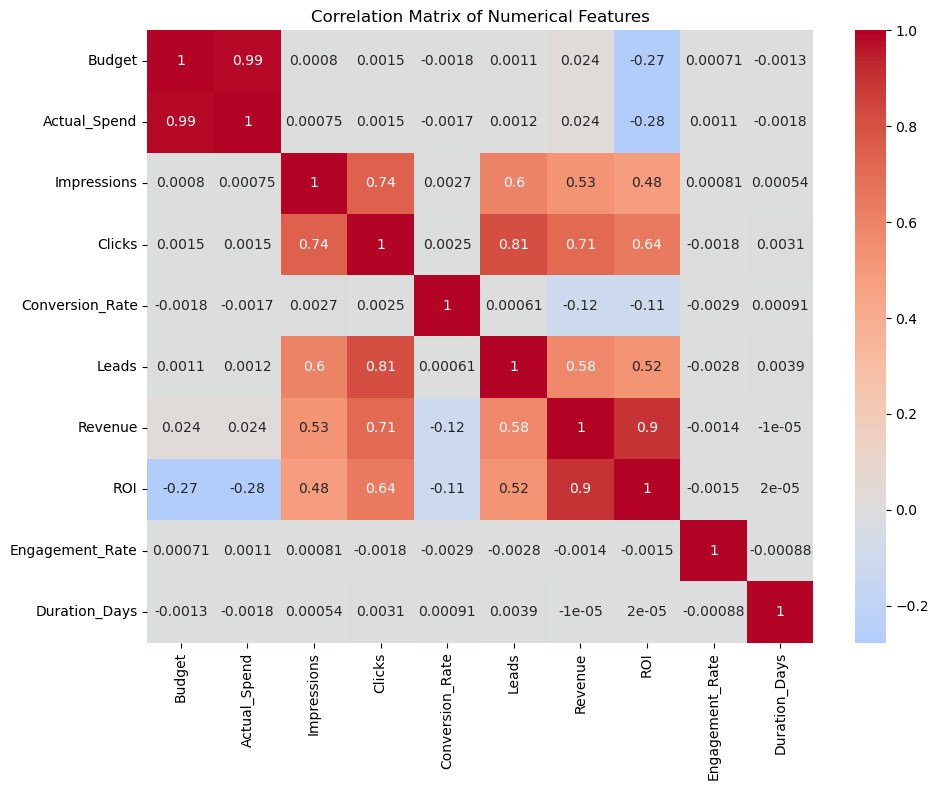

In [8]:
# Select numerical columns
numerical_cols = ['Budget', 'Actual_Spend', 'Impressions', 'Clicks', 
                 'Conversion_Rate', 'Leads', 'Revenue', 'ROI', 
                 'Engagement_Rate', 'Duration_Days']

# Create correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [3]:
# Feature Engineering
def prepare_features(df):
    # Create copy to avoid modifying original data
    df_features = df.copy()
    
    # 1. Convert categorical variables to numeric
    categorical_cols = ['Campaign_Type', 'Product_Type', 'Geographic_Region', 
                       'Target_Audience', 'Creative_Type', 'Quarter']
    
    df_features = pd.get_dummies(df_features, columns=categorical_cols)
    
    # 2. Convert dates to more useful features
    df_features['Start_Date'] = pd.to_datetime(df_features['Start_Date'])
    df_features['Month'] = df_features['Start_Date'].dt.month
    
    # 3. Select relevant numerical features
    numerical_features = ['Budget', 'Duration_Days', 'Month', 
                         'Impressions', 'Clicks', 'Conversion_Rate']
    
    # 4. Combine numerical and encoded categorical features
    features = df_features[numerical_features + list(df_features.filter(like='Campaign_Type_')) + 
                          list(df_features.filter(like='Product_Type_')) +
                          list(df_features.filter(like='Geographic_Region_'))]
    
    # 5. Define target variable
    target = df_features['ROI']
    
    return features, target

# Prepare features and target
X, y = prepare_features(df)

print("Features shape:", X.shape)
print("\nFeature columns:", X.columns.tolist())

Features shape: (200000, 22)

Feature columns: ['Budget', 'Duration_Days', 'Month', 'Impressions', 'Clicks', 'Conversion_Rate', 'Campaign_Type_Content Marketing', 'Campaign_Type_Direct Mail', 'Campaign_Type_Email Marketing', 'Campaign_Type_Social Media', 'Campaign_Type_TV Advertising', 'Product_Type_Gaming Consoles', 'Product_Type_Laptop Computers', 'Product_Type_Smart Home Security', 'Product_Type_Smart Watches', 'Product_Type_Smartphones', 'Product_Type_Wireless Headphones', 'Geographic_Region_Midwest', 'Geographic_Region_Northeast', 'Geographic_Region_Southeast', 'Geographic_Region_Southwest', 'Geographic_Region_West']


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to CSV format for SageMaker
train_data = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1)
test_data = pd.concat([pd.DataFrame(y_test), pd.DataFrame(X_test)], axis=1)

# Save locally first
train_data.to_csv('train.csv', header=False, index=False)
test_data.to_csv('test.csv', header=False, index=False)

# Upload to S3
s3_client = boto3.client('s3')
bucket = 'campaignai-rg'
prefix = 'marketing-campaign-xgboost'

s3_client.upload_file('train.csv', bucket, f'{prefix}/train/train.csv')
s3_client.upload_file('test.csv', bucket, f'{prefix}/test/test.csv')

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFiles uploaded to S3 successfully!")

Training set shape: (160000, 22)
Testing set shape: (40000, 22)

Files uploaded to S3 successfully!


In [4]:
# Save the training script
with open('xgboost_script.py', 'w') as f:
    f.write('''import os
import argparse
import json
import pandas as pd
import xgboost as xgb

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--num_round', type=int, default=100)
    parser.add_argument('--max_depth', type=int, default=6)
    parser.add_argument('--eta', type=float, default=0.2)
    parser.add_argument('--gamma', type=float, default=4)
    parser.add_argument('--min_child_weight', type=int, default=6)
    parser.add_argument('--subsample', type=float, default=0.8)
    return parser.parse_known_args()

if __name__ == '__main__':
    args, _ = parse_args()
    train = pd.read_csv(f'{os.environ["SM_CHANNEL_TRAIN"]}/train.csv', header=None)
    validation = pd.read_csv(f'{os.environ["SM_CHANNEL_VALIDATION"]}/test.csv', header=None)
    
    X_train = train.iloc[:, 1:]
    y_train = train.iloc[:, 0]
    X_validation = validation.iloc[:, 1:]
    y_validation = validation.iloc[:, 0]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_validation, label=y_validation)
    
    params = {
        'max_depth': args.max_depth,
        'eta': args.eta,
        'gamma': args.gamma,
        'min_child_weight': args.min_child_weight,
        'subsample': args.subsample,
        'objective': 'reg:squarederror'
    }
    
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=args.num_round,
        evals=[(dtrain, 'train'), (dval, 'validation')]
    )
    
    model.save_model(os.path.join(os.environ['SM_MODEL_DIR'], 'xgboost-model'))
''')

In [5]:
import sagemaker
from sagemaker.xgboost import XGBoost
from sagemaker import get_execution_role

# Set up SageMaker session and role
session = sagemaker.Session()
role = get_execution_role()

# Define S3 paths
bucket = 'campaignai-rg'
prefix = 'marketing-campaign-xgboost'
train_path = f's3://{bucket}/{prefix}/train/train.csv'
test_path = f's3://{bucket}/{prefix}/test/test.csv'

# Set up XGBoost estimator
xgb = XGBoost(
    entry_point='xgboost_script.py',
    role=role,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    framework_version='1.5-1',
    hyperparameters={
        'max_depth': 6,
        'eta': 0.2,
        'gamma': 4,
        'min_child_weight': 6,
        'subsample': 0.8,
        'num_round': 100
    }
)

# Train the model
xgb.fit({'train': train_path, 'validation': test_path})

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-02-19-02-20-04-710


2025-02-19 02:20:06 Starting - Starting the training job...
2025-02-19 02:20:39 Downloading - Downloading input data...
2025-02-19 02:21:04 Downloading - Downloading the training image......
2025-02-19 02:21:50 Training - Training image download completed. Training in progress../miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[2025-02-19 02:22:01.690 ip-10-2-96-96.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-02-19 02:22:01.712 ip-10-2-96-96.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-02-19:02:22:02:INFO] Imported framework sagemaker_xgboost_container.training
[2025-02-19:02:22:02:INFO] No GPUs detected (normal if no gpus installed)
[2025-02-19:02:22:02:INFO] Invoking user training script.
[2025-02-19:02:22:02:

In [ ]:
# Simple deployment first
xgb_predictor = xgb.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium'
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-02-19-03-20-13-547
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-02-19-03-20-13-547
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-02-19-03-20-13-547


------------------------